<a href="https://colab.research.google.com/github/WotySmith/System_analysis_laby/blob/main/%D0%9B%D0%A01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Михайлов Максим, ЭНМ1-92
import pandas as pd     # для чтения и записи табличных файлов
import numpy as np      # для математической обработки данных
import matplotlib.pyplot as plt # для построения графиков

In [18]:
# https://drive.google.com/file/d/10X7i5PYwSAe08JtXUKDBkfWUHTuI8NMm/view?usp=sharing
url = "https://drive.google.com/uc?export=download&id=10X7i5PYwSAe08JtXUKDBkfWUHTuI8NMm"

input_df = pd.read_csv(url, header = None)
input_df.head()

,0
0,2200
1,7700
2,12100
3,17600
4,23100


In [12]:
input_df.tail()

,0
60282,-23100
60283,-18700
60284,-14300
60285,-11000
60286,-5500


In [52]:
input_matrix = input_df.values
I = input_matrix [:,0]*0.001
print (I)

[  2.2   7.7  12.1 ... -14.3 -11.   -5.5]


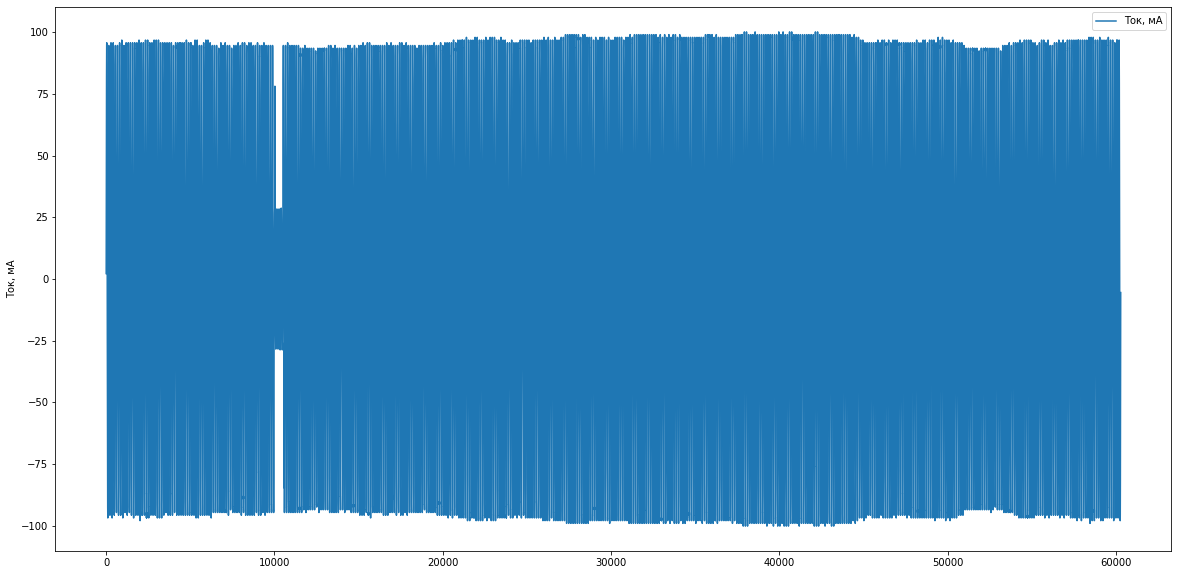

In [120]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook, export_png

output_notebook()

p = figure(plot_width = 800, plot_height = 400)

p.line(np.arange(len(I)), I, line_width = 2)
p.scatter(np.arange(len(I)), I)

show(p)

fig, ax = plt.subplots(figsize = (20, 10))
ax.plot(I)
ax.set_ylabel('Ток, мА') 
ax.legend(['Ток, мА'])
plt.savefig('Ток')

data_frame = pd.DataFrame(I)
data_frame.to_excel('ток.xlsx', index = False, header = ['Ток, мА'])

#export_png (p, filename = "Ток.png")
#Bokeh не хочет сохранять график в картинку, поэтому использую для этого matplot

In [65]:
sum_I = (I[0:1280]).sum(axis=0)
mean_I = sum_I/len(I[0:1280])
print ("mean I(0...1280) = {:.3f} mA".format(mean_I))

mean I(0...1280) = -0.184 mA


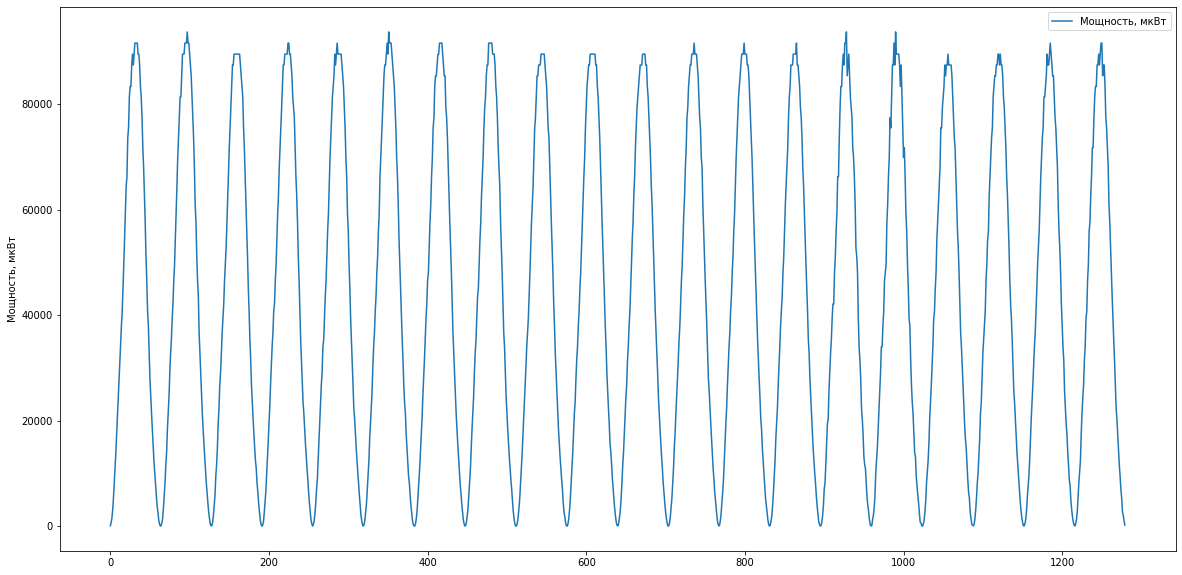

In [125]:
R = 10
P = np.zeros(1280)
for i in range (1280):
  P[i] = I[i]**2*R

output_notebook()

p = figure(plot_width = 800, plot_height = 400)

p.line(np.arange(1280), P, line_width = 2)
p.scatter(np.arange(1280), P)

show(p)

fig, ax = plt.subplots(figsize = (20, 10))
ax.plot(P)
ax.set_ylabel('Мощность, мкВт') 
ax.legend(['Мощность, мкВт'])
plt.savefig('Мощность')

data_frame = pd.DataFrame(I)
data_frame.to_excel('Мощность.xlsx', index = False, header = ['Мощность, мкВт'])

In [123]:
print ("mean P (0...1280) = {:.3f} mW".format(P.mean()/1000))
sum_modI = (abs(I[0:1280])).sum(axis=0)
mean_modI = sum_modI/len(I[0:1280])
P_meanI = mean_modI**2*R/1000
print ("mean P(I_mean) (0...1280) = {:.3f} mW".format(P_meanI))
# Значения существенно отличаются, так как мощность зависит от квадрата тока.
# Следовательно, чтобы найти среднюю мощность, нужно использовать среднеквадратичное значение тока (см. блок ниже).

mean P (0...1280) = 44.543 mW
mean P(I_mean) (0...1280) = 36.215 mW


In [124]:
from math import sqrt
sum_sqI = (I[0:1280]**2).sum()
sqmean_I = sqrt(sum_sqI/1280)
P_sqmeanI = sqmean_I**2*R/1000
print ("mean P(I_sqmean) (0...1280) = {:.3f} mW".format(P_sqmeanI))

mean P(I_sqmean) (0...1280) = 44.543 mW
